In [4]:
!pip install bidict
!pip install h5py
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install scipy
!pip install shortuuid
!pip install six
!pip install joblib
!pip install -q biosppy
!pip install vitaldb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 3.9 MB/s eta 0:00:00
Looking in indexes: https://

In [5]:
from tqdm.notebook import tqdm
import numpy as np



import vitaldb

In [6]:
vals = vitaldb.load_case(30, ['ECG_II','ECG_V5'],1/100)

signal_II = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]

signal_V5 = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]


In [ ]:
from biosppy import storage
from biosppy.signals import ecg

# process it and plot
out = ecg.ecg(signal=signal_II, sampling_rate=100., show=False)

In [14]:
out["rpeaks"]

array([    406,     787,    1180, ..., 5262336, 5263615, 5263853])

In [24]:
t = np.arange(0, 2,1/500)
len(t)


1000

In [25]:
t


array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
       0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
       0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
       0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
       0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
       0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106,
       0.108, 0.11 , 0.112, 0.114, 0.116, 0.118, 0.12 , 0.122, 0.124,
       0.126, 0.128, 0.13 , 0.132, 0.134, 0.136, 0.138, 0.14 , 0.142,
       0.144, 0.146, 0.148, 0.15 , 0.152, 0.154, 0.156, 0.158, 0.16 ,
       0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176, 0.178,
       0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194, 0.196,
       0.198, 0.2  , 0.202, 0.204, 0.206, 0.208, 0.21 , 0.212, 0.214,
       0.216, 0.218, 0.22 , 0.222, 0.224, 0.226, 0.228, 0.23 , 0.232,
       0.234, 0.236, 0.238, 0.24 , 0.242, 0.244, 0.246, 0.248, 0.25 ,
       0.252, 0.254,

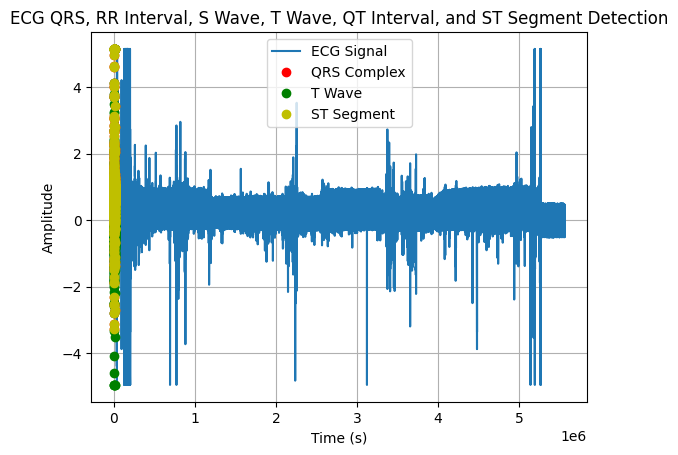

RR Intervals: [ 762.  786.  774. ... 4466. 2558.  476.] ms


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg

t = np.arange(0, 2, 1/500)  # Time vector (2 seconds)

# QRS, RR interval, S wave, T wave, QT interval, and ST segment detection
def detect_ecg_segments(ecg_signal, fs):
    # Process the ECG signal using biosppy
    out = ecg.ecg(signal=ecg_signal, sampling_rate=fs, show=False)
    
    # Get the QRS complex indices
    qrs_indices = out['rpeaks']
    
    # Calculate RR intervals
    rr_intervals = np.diff(qrs_indices) / fs * 1000  # Convert to milliseconds
    
    # Detect S waves
    s_wave_indices = out['templates'][:, 0].argmin(axis=0) + qrs_indices[:-1]
    
    # Detect T waves
    t_wave_indices = out['templates'][:, 2].argmax(axis=0) + qrs_indices[:-1]
    
    # Calculate QT intervals
    #qt_intervals = out['qtc']
    
    # Get the ST segment indices
    st_segment_indices = out['rpeaks']
    
    return qrs_indices, rr_intervals, s_wave_indices, t_wave_indices, st_segment_indices

# Run QRS, RR interval, S wave, T wave, QT interval, and ST segment detection
qrs_indices, rr_intervals, s_wave_indices, t_wave_indices, st_segment_indices = detect_ecg_segments(signal_II, 500)

# Plot the ECG signal with detected QRS complexes, RR intervals, S waves, T waves, QT interval, and ST segment
plt.figure()
plt.plot(signal_II, label='ECG Signal')
plt.plot(signal_II[qrs_indices], 'ro', label='QRS Complex')
plt.plot(signal_II[t_wave_indices], 'go', label='T Wave')
plt.plot(signal_II[st_segment_indices], 'yo', label='ST Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ECG QRS, RR Interval, S Wave, T Wave, QT Interval, and ST Segment Detection')
plt.legend()
plt.grid(True)
plt.show()

# Print the calculated RR intervals, QT intervals
print('RR Intervals:', rr_intervals, 'ms')
#print('QT Intervals:', qt_intervals, 'ms')

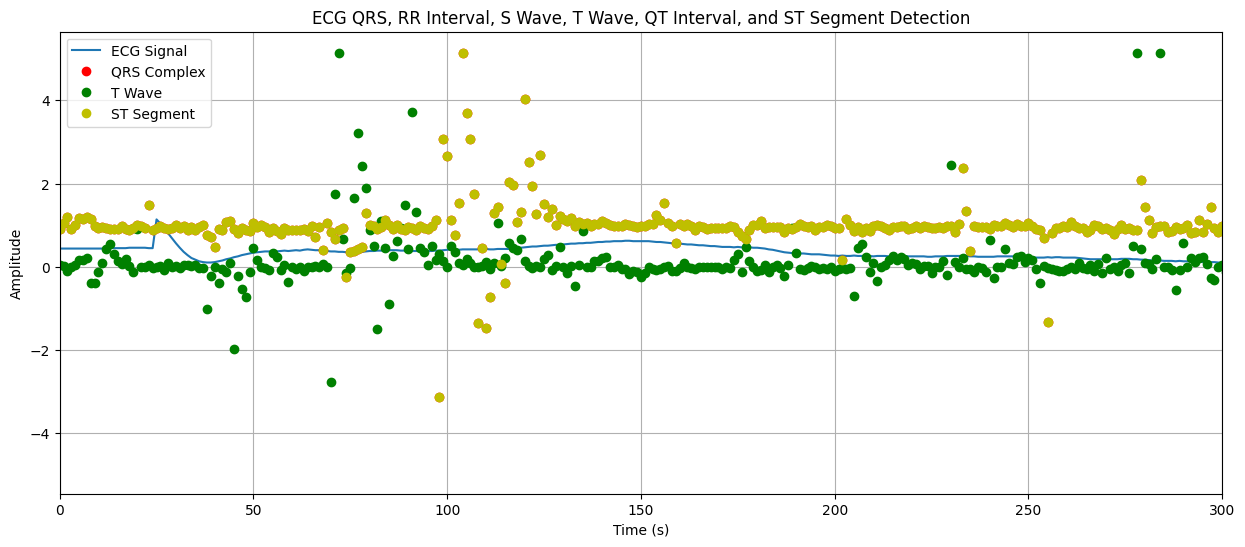

RR Intervals: [ 762.  786.  774. ... 4466. 2558.  476.] ms


In [31]:
plt.figure(figsize=(15, 6))
plt.plot(signal_II, label='ECG Signal')
plt.plot(signal_II[qrs_indices], 'ro', label='QRS Complex')
plt.plot(signal_II[t_wave_indices], 'go', label='T Wave')
plt.plot(signal_II[st_segment_indices], 'yo', label='ST Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ECG QRS, RR Interval, S Wave, T Wave, QT Interval, and ST Segment Detection')
plt.xlim( 0 , 300)
plt.legend()

plt.grid(True)
plt.show()

# Print the calculated RR intervals, QT intervals
print('RR Intervals:', rr_intervals, 'ms')
#print('QT Intervals:', qt_intervals, 'ms')

In [1]:
!pip install neurokit2 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00


In [7]:

import neurokit2 as nk
_, rpeaks = nk.ecg_peaks(signal_II, sampling_rate=100)
_, waves_peak = nk.ecg_delineate(signal_II, rpeaks, sampling_rate=100, method="peak")

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


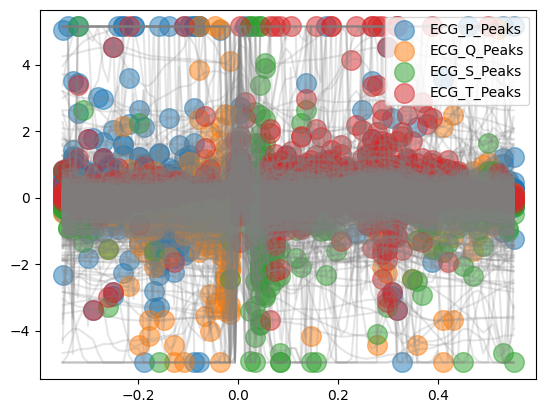

In [8]:
signal_dwt, waves_dwt = nk.ecg_delineate(signal_II, 
                                        rpeaks, 
                                        sampling_rate=100, 
                                        method="dwt", 
                                        show=True, 
                                        show_type='peaks')

In [27]:
waves_peak.keys()

dict_keys(['ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_P_Onsets', 'ECG_T_Offsets'])

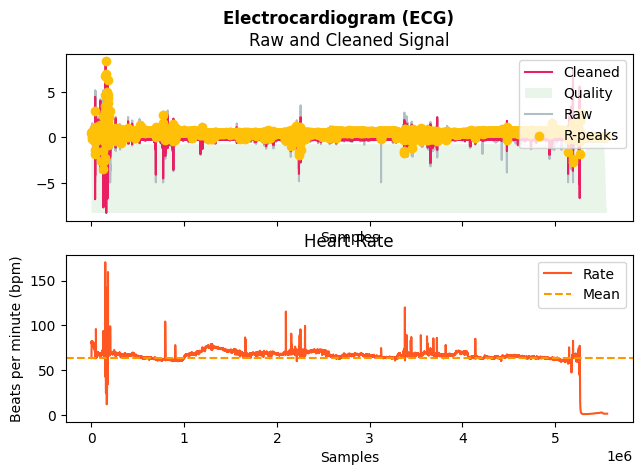

In [44]:
import neurokit2 as nk

# Simulate ECG signal
#ecg = nk.ecg_simulate(duration=15, sampling_rate=500, heart_rate=80)

# Preprocess ECG signal
signals, info = nk.ecg_process(signal_II, sampling_rate=500,method='neurokit')

# Visualize
nk.ecg_plot(signals)

In [41]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,0.435255,0.043396,63.488987,0.97265,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,0.435255,0.043873,63.488987,0.97265,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,0.435255,0.044351,63.488987,0.97265,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,0.435255,0.044928,63.488987,0.97265,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,0.435255,0.045605,63.488987,0.97265,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560539,0.366133,0.274468,1.236349,0.00000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
5560540,0.168642,0.214407,1.236349,0.00000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
5560541,-0.107846,0.148456,1.236349,0.00000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
5560542,-0.315212,0.083320,1.236349,0.00000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [42]:
info

{'ECG_R_Peaks': array([    406,     786,    1176, ..., 5503075, 5527340, 5551605]),
 'sampling_rate': 500}

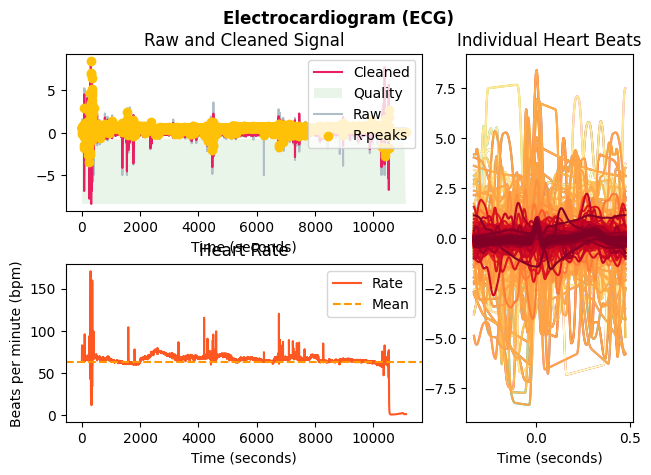

In [43]:
import neurokit2 as nk

# Simulate data
#ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80)

# Process signal
signals, info = nk.ecg_process(signal_II, sampling_rate=500,method='neurokit')

# Plot
nk.ecg_plot(signals, sampling_rate=500, show_type='default')